In [19]:
import pandas as pd

df=pd.read_csv('Recent_Contract_Awards.csv')
df.head()

D:\Program\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (12,13,14,15,27,29) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,RequestID,StartDate,EndDate,AgencyName,TypeOfNoticeDescription,CategoryDescription,ShortTitle,SelectionMethodDescription,SectionName,SpecialCaseReasonDescription,...,Printout2,Printout3,DocumentLinks,EventDate,EventBuildingName,EventStreetAddress1,EventStreetAddress2,EventCity,EventStateCode,EventZipCode
0,20100628021,07/06/2010,07/06/2010,Transportation,Award,Services (other than human services),NOTICE OF AWARD OF CONCESSION AT EAST RIVER PI...,Competitive Sealed Bids,Procurement,NaN,...,NaN,NaN,https://a856-cityrecord.nyc.gov/Search/GetFile...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20130214010,02/22/2013,02/22/2013,Parks and Recreation,Award,Services (other than human services),DEPARTMENT OF PARKS AND RECREATION NOTICE OF...,Public Bid,Procurement,NaN,...,NaN,NaN,https://a856-cityrecord.nyc.gov/Search/GetFile...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20090911004,09/18/2009,09/18/2009,Transportation,Award,Services (other than human services),"OPERATION, MANAGEMENT, AND MAINTENANCE OF PEDE...",Sole Source,Procurement,Other (Describe below in Other Legally Mandate...,...,NaN,NaN,https://a856-cityrecord.nyc.gov/Search/GetFile...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20130415019,04/22/2013,04/22/2013,Parks and Recreation,Award,Goods,NOTICE OF AWARD,Public Bid,Procurement,NaN,...,NaN,NaN,https://a856-cityrecord.nyc.gov/Search/GetFile...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20110623031,06/24/2011,06/24/2011,Transportation,Award,Services (other than human services),AIRPORT BUS FRANCHISE NOTICE OF AWARD,Request for Proposals,Procurement,NaN,...,NaN,NaN,https://a856-cityrecord.nyc.gov/Search/GetFile...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df.shape

(35528, 37)

In [21]:
df['StartDatesep'] = pd.to_datetime(df['StartDate'])

In [22]:
df['startyear'], df['startmonth'] = df['StartDatesep'].dt.year, df['StartDatesep'].dt.month
df.head()

,RequestID,StartDate,EndDate,AgencyName,TypeOfNoticeDescription,CategoryDescription,ShortTitle,SelectionMethodDescription,SectionName,SpecialCaseReasonDescription,...,EventDate,EventBuildingName,EventStreetAddress1,EventStreetAddress2,EventCity,EventStateCode,EventZipCode,StartDatesep,startyear,startmonth
0,20100628021,07/06/2010,07/06/2010,Transportation,Award,Services (other than human services),NOTICE OF AWARD OF CONCESSION AT EAST RIVER PI...,Competitive Sealed Bids,Procurement,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-07-06,2010,7
1,20130214010,02/22/2013,02/22/2013,Parks and Recreation,Award,Services (other than human services),DEPARTMENT OF PARKS AND RECREATION NOTICE OF...,Public Bid,Procurement,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-02-22,2013,2
2,20090911004,09/18/2009,09/18/2009,Transportation,Award,Services (other than human services),"OPERATION, MANAGEMENT, AND MAINTENANCE OF PEDE...",Sole Source,Procurement,Other (Describe below in Other Legally Mandate...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009-09-18,2009,9
3,20130415019,04/22/2013,04/22/2013,Parks and Recreation,Award,Goods,NOTICE OF AWARD,Public Bid,Procurement,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-04-22,2013,4
4,20110623031,06/24/2011,06/24/2011,Transportation,Award,Services (other than human services),AIRPORT BUS FRANCHISE NOTICE OF AWARD,Request for Proposals,Procurement,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-06-24,2011,6


Keep only rows with a StartDate occurring from 2010 to 2019, inclusive. Next, remove all rows for which the ContractAmount field is less than or equal to zero, or is missing entirely. Use this filtered data for the rest of the challenge, as well. For the remaining data, what is the total sum of contract amounts?

In [23]:
df=df.loc[df.ContractAmount>=0]

In [24]:
df.shape

(34093, 40)

In [25]:
df=df.loc[(df.startyear>=2010)&(df.startyear<=2019)]

In [26]:
df.shape

(18221, 40)

In [27]:
sum(df.ContractAmount)

207783994327.83908

In [28]:
df.ContractAmount.isnull().sum(axis=0)

0

Determine the number of contracts awarded by each agency. For the top 5 agencies in terms the number of contracts, compute the mean ContractAmount per contract. Among these values, what is the ratio of the highest mean contract amount to the second highest?

In [29]:
a=df[[ 'ContractAmount', 'AgencyName']].groupby(['AgencyName']).agg(['mean', 'count']).sort_values(('ContractAmount','count'),ascending=False).head(5)

In [30]:
a.head()

ContractAmount      
                                                             mean count
AgencyName                                                             
Citywide Administrative Services                     3.794259e+06  5098
Health and Mental Hygiene                            5.155477e+07  2146
Dept Of Social Svcs/Human Resources Administration   5.499856e+06  1827
Design and Construction                              1.076263e+07  1454
Administration for Children's Services               6.911672e+06   892

In [31]:
a.columns

MultiIndex([('ContractAmount',  'mean'),
            ('ContractAmount', 'count')],
           )

In [32]:
a[('ContractAmount',  'mean')][0]/a[('ContractAmount',  'mean')][1]

0.07359666603788505

Consider only procurements made by the Citywide Administrative Services agency and compute the sum contract amount awarded to each unique vendor. What proportion of the total number of contracts in the data set were awarded to the top 50 vendors?

In [33]:
df.columns

Index(['RequestID', 'StartDate', 'EndDate', 'AgencyName',
       'TypeOfNoticeDescription', 'CategoryDescription', 'ShortTitle',
       'SelectionMethodDescription', 'SectionName',
       'SpecialCaseReasonDescription', 'PIN', 'DueDate', 'AddressToRequest',
       'ContactName', 'ContactPhone', 'Email', 'ContractAmount', 'ContactFax',
       'AdditionalDescription1', 'AdditionalDesctription2',
       'AdditionalDescription3', 'OtherInfo1', 'OtherInfo2', 'OtherInfo3',
       'VendorName', 'VendorAddress', 'Printout1', 'Printout2', 'Printout3',
       'DocumentLinks', 'EventDate', 'EventBuildingName',
       'EventStreetAddress1', 'EventStreetAddress2', 'EventCity',
       'EventStateCode', 'EventZipCode', 'StartDatesep', 'startyear',
       'startmonth'],
      dtype='object')

In [34]:
dfCitywide =df.loc[df['AgencyName']=='Citywide Administrative Services']
dfCitywide.head()

,RequestID,StartDate,EndDate,AgencyName,TypeOfNoticeDescription,CategoryDescription,ShortTitle,SelectionMethodDescription,SectionName,SpecialCaseReasonDescription,...,EventDate,EventBuildingName,EventStreetAddress1,EventStreetAddress2,EventCity,EventStateCode,EventZipCode,StartDatesep,startyear,startmonth
168,20110726010,08/02/2011,08/02/2011,Citywide Administrative Services,Award,Construction/Construction Services,"ELEVATOR UPGRADE, 80 CENTRE STREET",Competitive Sealed Bids,Procurement,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-08-02,2011,8
172,20151019009,10/26/2015,10/26/2015,Citywide Administrative Services,Award,Goods,"EQUIPMENT II, RENTAL OF VARIOUS",Other,Procurement,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-10-26,2015,10
173,20190531014,06/07/2019,06/07/2019,Citywide Administrative Services,Award,Goods,NYS OGS - TASK FORCE RESCUE SYSTEM - FDNY,Intergovernmental Purchase,Procurement,Other (Describe below in Other Legally Mandate...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-06-07,2019,6
175,20160420023,04/27/2016,04/27/2016,Citywide Administrative Services,Award,Goods,SNACKS,Competitive Sealed Bids,Procurement,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-04-27,2016,4
190,20160425024,05/02/2016,05/02/2016,Citywide Administrative Services,Award,Goods,"FRUITS AND VEGETABLES - FRESH, SEASONAL",Competitive Sealed Bids,Procurement,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-05-02,2016,5


In [35]:
dfCitywide['ContractAmount'].sum()

19343132463.83

In [36]:
839124787.0699999/19343132463.83

0.04338101849010709

In [37]:
b=dfCitywide[[ 'ContractAmount']].groupby(dfCitywide.VendorName).agg(['sum','count']).sort_values(('ContractAmount','count'),ascending=False).head(50)
b['ContractAmount','count'].sum()

845

In [38]:
df[['ContractAmount']].groupby(df['AgencyName']).sum().loc['Citywide Administrative Services']

ContractAmount    1.934313e+10
Name: Citywide Administrative Services, dtype: float64

In [39]:
b['ContractAmount','sum'].sum()/dfCitywide['ContractAmount'].sum()

0.04338101849010709

In [40]:
b['ContractAmount','sum'].sum()/df[['ContractAmount']].groupby(df['AgencyName']).sum().loc['Citywide Administrative Services']

ContractAmount    0.043381
Name: Citywide Administrative Services, dtype: float64

In [41]:
b['ContractAmount','sum'].sum()

839124787.0699999

Do agencies publish procurement notices uniformly throughout the week? As an example, consider the agency of Parks and Recreation. For this agency, compute the weekday for which each notice was published, and perform a Chi-squared test on the null hypothesis that each weekday occurs equally often. Report the value of the test statistic.

In [42]:
dfPark =df.loc[df['AgencyName']=='Parks and Recreation']
dfPark.head()

,RequestID,StartDate,EndDate,AgencyName,TypeOfNoticeDescription,CategoryDescription,ShortTitle,SelectionMethodDescription,SectionName,SpecialCaseReasonDescription,...,EventDate,EventBuildingName,EventStreetAddress1,EventStreetAddress2,EventCity,EventStateCode,EventZipCode,StartDatesep,startyear,startmonth
1,20130214010,02/22/2013,02/22/2013,Parks and Recreation,Award,Services (other than human services),DEPARTMENT OF PARKS AND RECREATION NOTICE OF...,Public Bid,Procurement,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-02-22,2013,2
3,20130415019,04/22/2013,04/22/2013,Parks and Recreation,Award,Goods,NOTICE OF AWARD,Public Bid,Procurement,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-04-22,2013,4
5,20130621002,06/27/2013,06/27/2013,Parks and Recreation,Award,Goods and Services,OPERATION AND MAINTENANCE OF UP TO TWO (2) BOO...,Request for Proposals,Procurement,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-06-27,2013,6
6,20130422012,04/29/2013,04/29/2013,Parks and Recreation,Award,Goods and Services,NOTICE OF CONCESSION AWARD,Public Bid,Procurement,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-04-29,2013,4
10,20130307016,03/15/2013,03/15/2013,Parks and Recreation,Award,Human Services/Client Services,PARKS AND RECREATION AWARD NOTICES,Public Bid,Procurement,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-03-15,2013,3


In [43]:
dfPark['TypeOfNoticeDescription'].unique()

array(['Award'], dtype=object)

In [44]:
dfPark.loc[dfPark.StartDate!=dfPark.EndDate]

,RequestID,StartDate,EndDate,AgencyName,TypeOfNoticeDescription,CategoryDescription,ShortTitle,SelectionMethodDescription,SectionName,SpecialCaseReasonDescription,...,EventDate,EventBuildingName,EventStreetAddress1,EventStreetAddress2,EventCity,EventStateCode,EventZipCode,StartDatesep,startyear,startmonth
1290,20130405006,04/08/2013,04/12/2013,Parks and Recreation,Award,Goods and Services,CORRECTION: CONTINENTAL BREAKFAST AND LUNCH,Sole Source,Procurement,Available only from a single source,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-04-08,2013,4
5177,20120210018,02/17/2012,02/24/2012,Parks and Recreation,Award,Goods and Services,GREENTHUMB GROWTOGETHER CONFERENCE,Sole Source,Procurement,Available only from a single source,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-02-17,2012,2
5520,20130513022,05/16/2013,05/22/2013,Parks and Recreation,Award,Goods and Services,"95161-PRINTING, INSTALLATION AND REMOVAL OF SU...",Sole Source,Procurement,Available only from a single source,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-05-16,2013,5
5611,20110325008,03/31/2011,04/06/2011,Parks and Recreation,Award,Goods and Services,CORRECTION: BUS SHELTER ADVERTISING,Sole Source,Procurement,Available only from a single source,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-03-31,2011,3
29711,20110726011,08/02/2011,08/08/2011,Parks and Recreation,Award,Goods and Services,SOFTWARE MAINTENANCE,Sole Source,Procurement,Available only from a single source,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-08-02,2011,8
30480,20100616013,06/18/2010,06/24/2010,Parks and Recreation,Award,Goods and Services,ADVERTISING ON MTA PROPERTY,Sole Source,Procurement,Available only from a single source,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-06-18,2010,6
30582,20111019010,10/25/2011,10/31/2011,Parks and Recreation,Award,Goods and Services,ZOO GARAGE EXTENSION,Sole Source,Procurement,Available only from a single source,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-10-25,2011,10
31101,20110929018,10/06/2011,10/13/2011,Parks and Recreation,Award,Goods and Services,ADVERTISING ON MTA PROPERTY,Sole Source,Procurement,Available only from a single source,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-10-06,2011,10
31128,20120709001,07/16/2012,07/20/2012,Parks and Recreation,Award,Goods and Services,SOFTWARE MAINTENANCE,Sole Source,Procurement,Available only from a single source,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-07-16,2012,7
31911,20110324001,03/30/2011,04/05/2011,Parks and Recreation,Award,Goods,ADVERTISING ON MTA PROPERTY,Sole Source,Procurement,Available only from a single source,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-03-30,2011,3


In [45]:
dfPark['day_of_week'] = dfPark['StartDatesep'].dt.weekday

D:\Program\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [46]:
dfPark.head()

,RequestID,StartDate,EndDate,AgencyName,TypeOfNoticeDescription,CategoryDescription,ShortTitle,SelectionMethodDescription,SectionName,SpecialCaseReasonDescription,...,EventBuildingName,EventStreetAddress1,EventStreetAddress2,EventCity,EventStateCode,EventZipCode,StartDatesep,startyear,startmonth,day_of_week
1,20130214010,02/22/2013,02/22/2013,Parks and Recreation,Award,Services (other than human services),DEPARTMENT OF PARKS AND RECREATION NOTICE OF...,Public Bid,Procurement,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2013-02-22,2013,2,4
3,20130415019,04/22/2013,04/22/2013,Parks and Recreation,Award,Goods,NOTICE OF AWARD,Public Bid,Procurement,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2013-04-22,2013,4,0
5,20130621002,06/27/2013,06/27/2013,Parks and Recreation,Award,Goods and Services,OPERATION AND MAINTENANCE OF UP TO TWO (2) BOO...,Request for Proposals,Procurement,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2013-06-27,2013,6,3
6,20130422012,04/29/2013,04/29/2013,Parks and Recreation,Award,Goods and Services,NOTICE OF CONCESSION AWARD,Public Bid,Procurement,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2013-04-29,2013,4,0
10,20130307016,03/15/2013,03/15/2013,Parks and Recreation,Award,Human Services/Client Services,PARKS AND RECREATION AWARD NOTICES,Public Bid,Procurement,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2013-03-15,2013,3,4


In [47]:
dfPark['day_of_week'].unique()

array([4, 0, 3, 2, 1], dtype=int64)

In [48]:
from scipy.stats import chisquare
chisquare(dfPark['day_of_week'])

Power_divergenceResult(statistic=709.9978917779339, pvalue=0.5035523965717198)

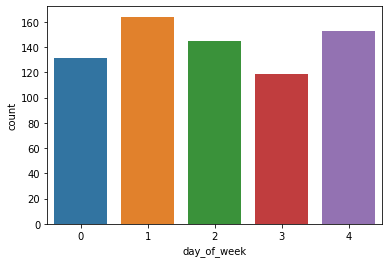

In [49]:
import seaborn
seaborn.countplot(dfPark['day_of_week'])

In [50]:
dfPark['day_of_week'].groupby(dfPark['day_of_week']).count()

day_of_week
0    131
1    164
2    145
3    119
4    153
Name: day_of_week, dtype: int64

In [51]:
chisquare(dfPark['day_of_week'].groupby(dfPark['day_of_week']).count())

Power_divergenceResult(statistic=8.870786516853933, pvalue=0.06441160992283528)

For this question, consider only contracts with in the categories of Construction Related Services and Construction/Construction Services. The ShortTitle field contains a description of the procured goods/services for each contract. Compute the sum contract amount for contracts whose ShortTitle refer to 'CENTRAL PARK' and for those which refer to 'WASHINGTON SQUARE PARK'. What is the ratio of total construction and contruction-related expenditure for the Central Park contracts compared to the Washington Square Park contracts? Note: you should ensure that 'PARK' appears on its own and not as the beginning of another word.

In [52]:
df.columns

Index(['RequestID', 'StartDate', 'EndDate', 'AgencyName',
       'TypeOfNoticeDescription', 'CategoryDescription', 'ShortTitle',
       'SelectionMethodDescription', 'SectionName',
       'SpecialCaseReasonDescription', 'PIN', 'DueDate', 'AddressToRequest',
       'ContactName', 'ContactPhone', 'Email', 'ContractAmount', 'ContactFax',
       'AdditionalDescription1', 'AdditionalDesctription2',
       'AdditionalDescription3', 'OtherInfo1', 'OtherInfo2', 'OtherInfo3',
       'VendorName', 'VendorAddress', 'Printout1', 'Printout2', 'Printout3',
       'DocumentLinks', 'EventDate', 'EventBuildingName',
       'EventStreetAddress1', 'EventStreetAddress2', 'EventCity',
       'EventStateCode', 'EventZipCode', 'StartDatesep', 'startyear',
       'startmonth'],
      dtype='object')

In [53]:
dfconstr=df.loc[(df.CategoryDescription=='Construction Related Services')|(df.CategoryDescription=='Construction/Construction Services') ]

In [54]:
dfconstr.loc[df.ShortTitle=='WASHINGTON SQUARE PARK']

,RequestID,StartDate,EndDate,AgencyName,TypeOfNoticeDescription,CategoryDescription,ShortTitle,SelectionMethodDescription,SectionName,SpecialCaseReasonDescription,...,EventDate,EventBuildingName,EventStreetAddress1,EventStreetAddress2,EventCity,EventStateCode,EventZipCode,StartDatesep,startyear,startmonth


In [55]:
dfconstr.loc[dfconstr['ShortTitle'].str.contains("WASHINGTON SQUARE PARK")]['ContractAmount']

32851    8939669.24
Name: ContractAmount, dtype: float64

In [56]:
dfconstr['ContractAmount'].loc[dfconstr['ShortTitle'].str.contains("CENTRAL PARK")].sum()

13198315.24

In [57]:
dfconstr['ContractAmount'].loc[dfconstr['ShortTitle'].str.contains("CENTRAL PARK")].sum()/dfconstr.loc[dfconstr['ShortTitle'].str.contains("WASHINGTON SQUARE PARK")]['ContractAmount'].sum()

1.4763762378304726

Is there a predictable, yearly pattern of spending for certain agencies? As an example, consider the Environmental Protection agency. For each month from 2010 through the end of 2019, compute the monthly expenditure for each agency. Once again, use StartDate for the contract date. Then, with a lag of 12 months, report the autocorrelation for total monthly expenditure.

In [58]:
dfEnvironmental=df.loc[df['AgencyName']=='Environmental Protection']

In [59]:
dfEnvironmental['monthly']=dfEnvironmental['StartDatesep'].dt.strftime('%Y-%m')

D:\Program\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [60]:
dfEnvironmental=dfEnvironmental.sort_values('monthly').reset_index(drop=True)

In [61]:
dfEnvironmental.groupby(dfEnvironmental['monthly'])['ContractAmount'].agg('sum')

monthly
2010-02    1.165714e+07
2010-03    2.345447e+07
2010-04    6.084658e+06
2010-05    1.491812e+06
2010-06    2.454927e+06
               ...     
2019-08    2.909235e+09
2019-09    1.542845e+07
2019-10    2.152839e+07
2019-11    5.725265e+07
2019-12    4.372172e+07
Name: ContractAmount, Length: 72, dtype: float64

In [62]:
dfEnvironmental['monthlysum']=dfEnvironmental.groupby(dfEnvironmental['monthly'])['ContractAmount'].transform('sum')

In [63]:
newdfEnvironmental=dfEnvironmental[['monthly', 'monthlysum']]

newdfEnvironmental=newdfEnvironmental.drop_duplicates(keep='first', inplace=False).reset_index(drop=True)

newdfEnvironmental=newdfEnvironmental.set_index('monthly')
newdfEnvironmental.head(2)

,monthlysum
monthly,
2010-02,11657138.22
2010-03,23454472.00


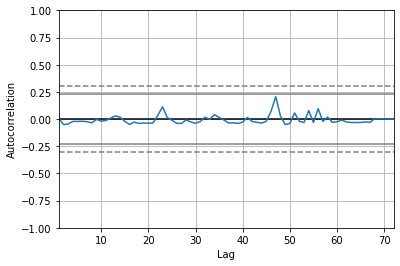

In [64]:
pd.plotting.autocorrelation_plot(newdfEnvironmental)

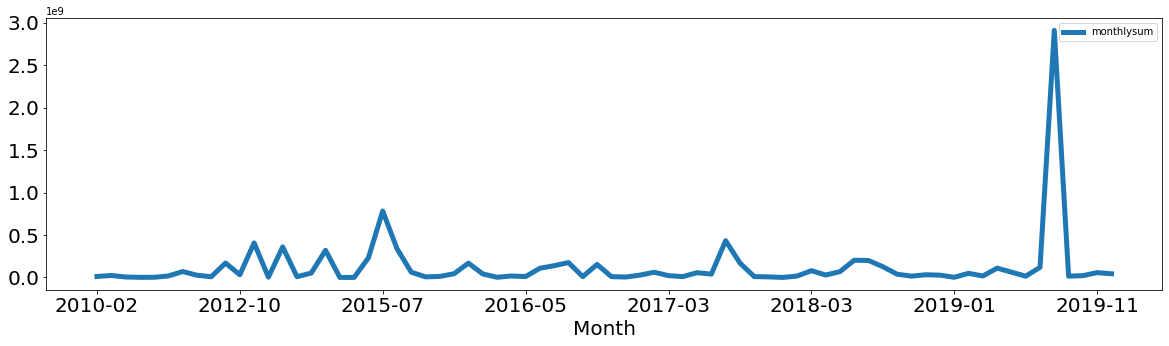

In [65]:
import matplotlib.pyplot as plt
newdfEnvironmental.plot(figsize=(20,5), linewidth=5, fontsize=20)
plt.xlabel('Month', fontsize=20);

In [66]:
newdfEnvironmental['monthlysum'].autocorr(lag=12)

0.03310011426677631

Consider only contracts awarded by the Citywide Administrative Services agency in the category Goods. Compute the total yearly expenditure (using StartDate) for these contracts and fit a linear regression model to these values. What is the R^2 value for this model?

In [67]:
dfCitywide =df.loc[(df['AgencyName']== 'Citywide Administrative Services') & (df['CategoryDescription']== 'Goods')]

dfCitywide['yearsum']=dfCitywide.groupby(dfCitywide['startyear'])['ContractAmount'].transform('sum')

newdfCitywide=dfCitywide[['startyear','yearsum']].drop_duplicates(inplace=False).sort_values('startyear').reset_index(drop=True)


D:\Program\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [69]:
import numpy as np
x=np.array(newdfCitywide['yearsum']).reshape(-1, 1)
y=np.array(newdfCitywide['startyear']).reshape(-1, 1)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x, y)

from sklearn.metrics import mean_squared_error, r2_score

ypred=regressor.predict(x)

r2_score(y,ypred)

0.3598764266839495

In this question, we will examine whether contract expenditure goes to companies located within or outside of New York City. To do so, we will extract the ZIP codes from the VendorAddress field. The ZIP codes pertaining to New York City can be found at the following URL: https://www.health.ny.gov/statistics/cancer/registry/appendix/neighborhoods.htm. Looking only at contracts with a StartDate in 2018, compute the total expenditure for contracts awarded to vendors listing NYC addresses and those located elsewhere. Report the proportion of the total expenditures awarded to the NYC vendors.

In [93]:
df2018=df.loc[df['startyear']==2018]

#df2018.loc[(df2018['VendorAddress'] .str.contains("New York"))|(df2018['VendorAddress'] .str.contains("NY"))]['ContractAmount'].sum()/df2018['ContractAmount'].sum()

In [94]:
import re
df2018['zipcode'] = df['VendorAddress'].str.extract(r'(\d{5})')

D:\Program\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [96]:
df2018=df2018.sort_values('zipcode',ascending=True).reset_index(drop=True)

df2018['zipcode'].isnull().sum(axis=0)


27

In [97]:
df2018.shape

(2481, 41)

In [98]:
df2018zipna=df2018.loc[df2018['zipcode'].isnull()]
df2018zipna.loc[(df2018zipna['VendorAddress'] .str.contains("New York"))|(df2018zipna['VendorAddress'] .str.contains("NY"))]['ContractAmount']

2458     100000.00
2468     150000.00
2469    8700357.00
2475    4188939.24
2478      27500.00
Name: ContractAmount, dtype: float64

In [99]:
df2018zipna.shape

(27, 41)

In [102]:
df2018zip=df2018[~df2018['zipcode'].isin(df2018zipna['zipcode'])]
df2018zip.shape

(2454, 41)

In [103]:
df2018zip['zipcode']=df2018zip['zipcode'].astype(int)

D:\Program\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [104]:
df2018ny=df2018zip.loc[(df2018zip['zipcode']>=10000)&(df2018zip['zipcode']<=11436)]

In [105]:
df2018ny.shape

(1622, 41)

In [106]:
df2018zip.loc[(df2018zip['zipcode']>=10000)&(df2018zip['zipcode']<=11436)]['ContractAmount'].sum()

13838203406.880001

In [109]:
df2018zipna.loc[(df2018zipna['VendorAddress'] .str.contains("New York"))|(df2018zipna['VendorAddress'] .str.contains("NY"))]['ContractAmount'].sum()

df2018['ContractAmount'].sum()

(13838203406.880001+13166796.24)/18743121770.03

0.7390108421142606